In [ ]:
! pip install control

# Task 1 (5 points)

Given a system:

<!-- A = 
    [0 0 1 0;
     0 0 0 1;
     n -2 -10/n -2;
     -5 -n/10 0 -3]; -->

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 n & -2 & -10/n & -2 \\
-5 & -n/10 & 0 & -3
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix}
u \\
y = \begin{bmatrix} 
1 & 1 & 0 & 0
\end{bmatrix} x
\end{cases}
$$

where $n$ is your number in your group list (ask your TA to give you your number if you don't have one). $$n = 8$$

## 1. Find its transfer function representation ($y(s) / u(s) = W(s)$).

$$
A = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 n & -2 & -10/n & -2 \\
-5 & -n/10 & 0 & -3
\end{bmatrix}=
\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 8 & -2 & -1.25 & -2 \\
-5 & -0.8 & 0 & -3
\end{bmatrix}\\
B = \begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix}\\
C = \begin{bmatrix}1\ 1\ 0\ 0\end{bmatrix}\\
\dot x = sIx\\
sIx=Ax+Bu\\
(sI-A)x=Bu\\
x=(sI-A)^{-1}Bu\\
y=C(sI-A)^{-1}Bu\\
\frac{y}{u}=C(sI-A)^{-1}B
$$

In [ ]:
from sympy import symbols, simplify
from sympy.matrices import Matrix, eye, Inverse
s = symbols('s')
A = Matrix([[0, 0, 1, 0], [0, 0, 0, 1], [8, -2, -10/8, -2], [-5, -8/10, 0, -3]])
B = Matrix(4,1,[0,0,-1,1])
C = Matrix(1,4,[1,1,0,0])
midPart = Inverse(eye(4)*s-A)
print("y/u = ", end='')
print(simplify(C*midPart*B)[0])



y/u = (-1.66893005371094e-6*s**10 - 5689008319.36511*s**9 - 47199805689.6658*s**8 + 124148384049.345*s**7 + 1765775498903.73*s**6 + 928933279057.732*s**5 - 20445664419874.8*s**4 - 33414689036727.8*s**3 + 66300036709035.8*s**2 + 153840380416331.0*s + 60643584687946.3)/(1517068885.16403*s**12 + 16687757736.8043*s**11 - 10657408918.2773*s**10 - 688578603614.889*s**9 - 1509947906042.28*s**8 + 9245370978789.43*s**7 + 34719214911786.2*s**6 - 36422154839718.6*s**5 - 266432036164106.0*s**4 - 100911439935288.0*s**3 + 666186864088824.0*s**2 + 669170589660097.0*s + 171474963600400.0)


$$y/u=\\=\frac{-1.66893005371094e-6*s^{10} - 5689008319.36511*s^9 - 47199805689.6658*s^8 + 124148384049.345*s^7 + 1765775498903.73*s^6 + 928933279057.732*s^5 - 20445664419874.8*s^4 - 33414689036727.8*s^3 + 66300036709035.8*s^2 + 153840380416331.0*s + 60643584687946.3}{1517068885.16403*s^{12} + 16687757736.8043*s^{11} - 10657408918.2773*s^{10} - 688578603614.889*s^9 - 1509947906042.28*s^8 + 9245370978789.43*s^7 + 34719214911786.2*s^6 - 36422154839718.6*s^5 - 266432036164106.0*s^4 - 100911439935288.0*s^3 + 666186864088824.0*s^2 + 669170589660097.0*s + 171474963600400.0}$$

## 2. Propose an ODE representation of the system.

$$
\begin{bmatrix}
\dot x_1\\
\dot x_2\\
\dot x_3\\
\dot x_4
\end{bmatrix} 
= 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 8 & -2 & -1.25 & -2 \\
-5 & -0.8 & 0 & -3
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
x_4
\end{bmatrix}\\
$$
$$
\begin{cases}
\dot x_1 = x_3\\
\dot x_2 = x_4\\
\dot x_3 = 8x_1 -2x_2 -1.25x_3 - 2x_4\\
\dot x_4 = -5x_1 -0.8x_2 - 3x_4
\end{cases}
$$

## 3. Propose a controller (control law $u = -Kx$) that makes the system stable. Do it via pole placement and as an LQR. For LQR show the cost function you chose.


In [ ]:
from scipy.signal import place_poles
import numpy as np
A = np.array([[ 0,     0,      1,      0], 
              [ 0,     0,      0,      1], 
              [ 8,    -2,     -10/8,  -2], 
              [-5,    -8/10,   0,     -3]])

B = np.array([[ 0],
              [ 0],
              [-1],
              [ 1]])

C = np.array([[1, 1, 0, 0]])

poles = [-1, -2, -3, -4]
np.linalg.eig(A)[0]

array([ 2.64707689+0.j        , -3.17528143+1.11982542j,
       -3.17528143-1.11982542j, -0.54651404+0.j        ])

There is an eigenvalue with $Re(λ)>0$, therefore system is unstable.

With $u = -Kx$:
$$
\dot x = Ax+Bu\\
\dot x = (A-BK)x\\
$$
To make this system stable for all $λ$, $Re(λ)<0$ must be true.

### Pole placement method:

Using sympy we can calcualate K such that $λ$ have values equal to ones given as 'poles'.
Let's place poles at $
\begin{bmatrix}
-1\ -2\ -3\ -4
\end{bmatrix}
$

In [ ]:
K_pp = place_poles(A, B, poles)
K_PP_gain = K_pp.gain_matrix
print("Pole placement yields K =", K_PP_gain[0])
print("With eigenvalues of (A-BK) =", (np.linalg.eig(A-np.dot(B, K_PP_gain)))[0])
print(f"\nu = -{K_PP_gain[0]}x\n")

Pole placement yields K = [-15.08045334   0.60842311  -4.15296628   1.59703372]
With eigenvalues of (A-BK) = [-4. -3. -2. -1.]

u = -[-15.08045334   0.60842311  -4.15296628   1.59703372]x



$$
u =-
\begin{bmatrix}
-15.08045334\\
0.60842311\\
-4.15296628\\
1.59703372
\end{bmatrix}x
$$

###LQR method

LQR method allows us to find such K, that $\int(x^TQx+u^TRu)dt$ is minimal.

Cost function:
$$
Q=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 5 & 0 & 0\\
0 & 0 & 20 & 0\\
0 & 0 & 0 & 2\\
\end{bmatrix}
x\\
R=1
$$

In [ ]:
from scipy.linalg import solve_continuous_are

Q = np.array([[1, 0,  0,   0],
              [0, 5,  0,   0],
              [0, 0,  20,  0],
              [0, 0,  0,   2]])

R = np.array([[1]])

K_lqr = solve_continuous_are(A,B,Q,R)
K_ret = np.dot(np.dot(np.linalg.inv(R), np.transpose(B)),K_lqr)

print("LQR yields K =", K_ret[0])
print("With eigenvalues of (A-BK) =", (np.linalg.eig(A-np.dot(B, K_ret)))[0])

LQR yields K = [-14.5451392    2.12920165  -5.49027044   1.78230032]
With eigenvalues of (A-BK) = [-0.56817467+0.j         -1.31559177+0.j         -4.81940216+0.87874299j
 -4.81940216-0.87874299j]


##4. Show stability of the closed-loop system via eigenvalue analysis.


By defenition of stability if for all $λ,\ Re(λ)\le 0$ then system is marginally stable. If previous condition is met and there exists such $λ$, that $Re(λ)<0$, than system is asymptotically stable.

In both LQR and Pole Placement metods we obtaned $K$, such that for all $λ,\ λ<0$, therefore both closed-loop systems are asymptotically stable.

## 5. Find stability margins by analysing Bode diagram for the system.

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


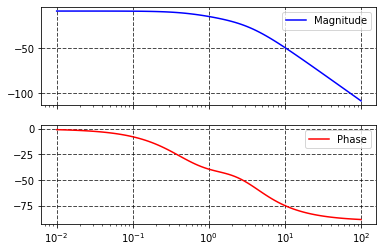

In [ ]:

from matplotlib.pyplot import *
from scipy.signal.ltisys import TransferFunction
from scipy.signal import ss2tf

D = np.array([[0]])

G = ss2tf(A, B, C, D)
sys = TransferFunction(G[0], G[1])

w, mag, phase = sys.bode()

f, (ax1, ax2) = subplots(2, 1, sharex=True)
ax1.semilogx(w, mag, color="blue", label="Magnitude")    # Bode magnitude plot
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.grid(True)
ax1.legend()

ax2.semilogx(w, phase, color="red", label="Phase")  # Bode phase plot
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.grid(True)
ax2.legend()
show()

Phase Crossover frequency: None  
**Gain margin:** $∞$ as Phase never reaches $-180°$

Gain crossover frequency: None  
**Phase margin:** $∞$ as Gain never reaches $0$

## 6. Simulate closed-loop system.

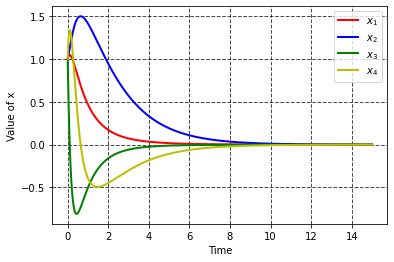

In [ ]:
from scipy.integrate import odeint
def system_ode(x, t, A, B, K):
    u = -np.dot(K,x)
    dx = np.dot(A,x) + np.dot(B,u)
    return dx
x0 = np.array([1, 1, 1, 1])
N = int(1E4) # Numbers of points in time span
t = np.linspace(0, 15, N) # Create time span
x_sol = odeint(system_ode, x0, t, args=(A, B, K_ret))

plot(t, x_sol[:,0], 'r', linewidth = 2., label = r'$x_1$')
plot(t, x_sol[:,1], 'b', linewidth = 2., label = r'$x_2$')
plot(t, x_sol[:,2], 'g', linewidth = 2., label = r'$x_3$')
plot(t, x_sol[:,3], 'y', linewidth = 2., label = r'$x_4$')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel('Value of x')
xlabel('Time')
show()

## 7. Modify the control law in such a way that the state of the system converges to $x_0 = \begin{bmatrix} 
2.8/3 \\
1 \\
0 \\
0 
\end{bmatrix}$. Show resulting control law. Simulate the system and demostrate convergence via graphs of state dynamics and error dynamics.

New control law will be as follows:
$$
u=K(x_d-x)+u_d\\
u_d = B^{-1}(\dot x_d - Ax_d)
$$  
Suppose the desired $\dot x_d = \begin{bmatrix} 
0 \\
0 \\
0 \\
0 
\end{bmatrix}$

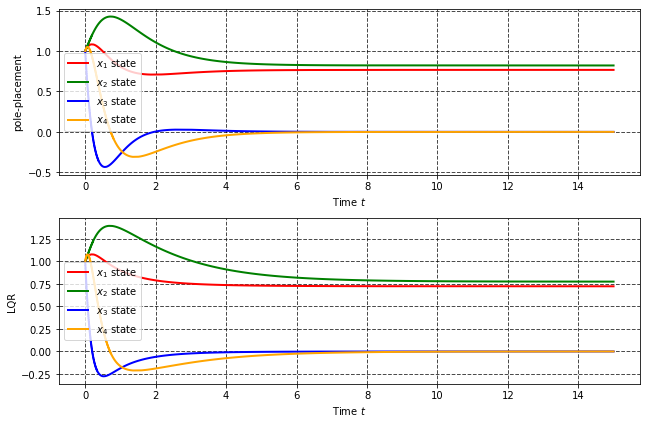

In [ ]:
def StateSpace_des(x, t, A, B, K, x_des, dx_des):
  u_ff = np.linalg.pinv(B) @ (dx_des - A @ x_des)
  u_fb = - K @ (x-x_des) 
  u = u_fb + u_ff
  return A @ x + B @ u

x_des = np.array([2.3/3, 1, 0, 0])
dx_des = np.array([0, 0, 0, 0])

x_sol_pole = odeint(StateSpace_des, x0, t, args=(A, B, K_PP_gain, x_des, dx_des))
u_pole = - np.dot(K_PP_gain, x_sol_pole.T)

x_sol_lqr = odeint(StateSpace_des, x0, t, args=(A, B, K_ret, x_des, dx_des))
u_lqr = - np.dot(K_ret, x_sol_lqr.T)


f, (ax1, ax2) = subplots(2, 1)
f.set_size_inches(9, 6)

colors = ['r', 'g', 'b', 'orange']
for i in range(4):
    ax1.step(t, x_sol_pole[:,i], colors[i], linewidth = 2., label = r'$x_{}$ state'.format(i+1))
ax1.legend()
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.grid(True)
ax1.set_ylabel(r'pole-placement')
ax1.set_xlabel(r'Time $t$')

for i in range(4):
    ax2.step(t, x_sol_lqr[:,i], colors[i], linewidth = 2., label = r'$x_{}$ state'.format(i+1))
ax2.legend()
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.grid(True)
ax2.set_ylabel(r'LQR')
ax2.set_xlabel(r'Time $t$')
f.tight_layout()
f.show()

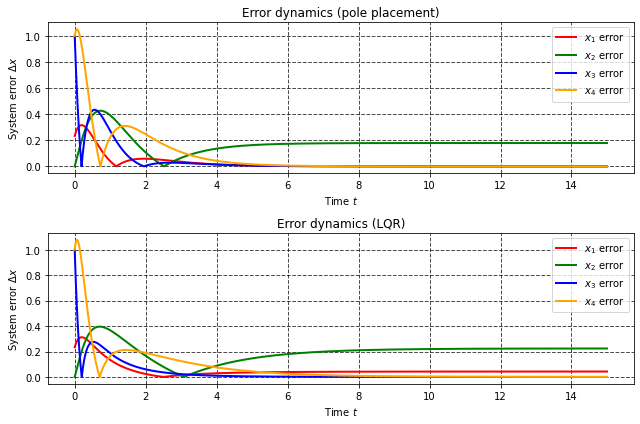

In [ ]:
f, (ax1, ax2) = subplots(2, 1)
f.set_size_inches(9, 6)

colors = ['r', 'g', 'b', 'orange']
for i in range(4):
    ax1.plot(t, np.abs(x_sol_pole[:,i] - x_des[i]), colors[i], linewidth = 2., label = r'$x_{}$ error'.format(i+1))
ax1.legend()
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.grid(True)
ax1.set_ylabel(r'System error $\Delta x$')
ax1.set_xlabel(r'Time $t$')
ax1.set_title('Error dynamics (pole placement)')

for i in range(4):
    ax2.plot(t, np.abs(x_sol_lqr[:,i] - x_des[i]), colors[i], linewidth = 2., label = r'$x_{}$ error'.format(i+1))
ax2.legend()
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.grid(True)
ax2.set_ylabel(r'System error $\Delta x$')
ax2.set_xlabel(r'Time $t$')
ax2.set_title('Error dynamics (LQR)')
f.tight_layout()
f.show()

## 8. Discretize the system with $\Delta t = 0.01$. Write equations of the discrete dinamics.

$
x[(k + 1)\Delta t] = 
\begin{bmatrix} 
1 & 0 & 0.01 & 0\\
0 & 1 & 0 & 0.01\\
0.08 &-0.02 &0.9875 & -0.02\\
-0.05 & -0.008 & 0 & 0.97  
\end{bmatrix}
x[k\Delta t]
+ 
\begin{bmatrix}
0 \\
0 \\
-0.01 \\
0.01
\end{bmatrix} u[k\Delta t]
$

In [ ]:
A = np.array([[ 0,     0,      1,      0], 
              [ 0,     0,      0,      1], 
              [ 8,    -2,     -10/8,  -2], 
              [-5,    -8/10,   0,     -3]])

B = np.array([[ 0],
              [ 0],
              [-1],
              [ 1]])

C = np.array([[1, 1, 0, 0]])

dt = 0.01

A_d = np.eye(4) + dt*A 
B_d = dt*B

print(f"A_d:\n{A_d}\n\nB_d:\n{B_d}")

A_d:
[[ 1.      0.      0.01    0.    ]
 [ 0.      1.      0.      0.01  ]
 [ 0.08   -0.02    0.9875 -0.02  ]
 [-0.05   -0.008   0.      0.97  ]]

B_d:
[[ 0.  ]
 [ 0.  ]
 [-0.01]
 [ 0.01]]


## 9. Propose a control law for the discrete system via pole-placement and LQR (show cost function for the LQR).

### Pole placement method

In [ ]:
poles = [0.99, 0.97, 0.7, 0.9]
K_d_pp = place_poles(A_d, B_d, poles)
K_pp = K_d_pp.gain_matrix

print("Pole placement yields K =", K_pp[0])
print("With eigenvalues of (A-BK) =", (np.linalg.eig(A-np.dot(B, K_pp)))[0])

Pole placement yields K = [-232.03162166  -88.90381978  -72.96925283  -33.21925283]
With eigenvalues of (A-BK) = [-30. -10.  -1.  -3.]


### LQR placement method

In [ ]:
from control import dlqr

Q = np.array([[1, 0,  0,   0],
              [0, 5,  0,   0],
              [0, 0,  20,  0],
              [0, 0,  0,   2]])

R = np.array([[1]])

K_d_lqr = solve_continuous_are(A_d, B_d, Q, R)
K_lqr, S, E = dlqr(A_d, B_d, Q, R)

print("LQR yields K =", K_lqr[0])
print("With eigenvalues of (A-BK) =", (np.linalg.eig(A-np.dot(B, K_lqr)))[0])

LQR yields K = [-14.29558426   2.10784505  -5.33187638   1.76583071]
With eigenvalues of (A-BK) = [-0.56785269+0.j         -1.30673297+0.j         -4.73656071+0.94068208j
 -4.73656071-0.94068208j]


## 10. Show eigenvalue analisys of the slosed-loop dynamics of the discrete system (with the proposed discrete control law. Demonstrate stability.

In [ ]:
# Pole-placement method
A_d_sl = A_d - B_d@K_pp
ei, Q = np.linalg.eig(A_d_sl)
print("Pole-placement Eigen values:\n", ei)
print("Pole-placement abs Eigen values:\n", abs(ei))

print()

# LQR method
A_d_sl = A_d - B_d@K_lqr
ei, Q = np.linalg.eig(A_d_sl)
print("LQR Eigen values:\n", ei)
print("LQR abs Eigen values:\n", abs(ei))

Pole-placement Eigen values:
 [0.7  0.9  0.97 0.99]
Pole-placement abs Eigen values:
 [0.7  0.9  0.97 0.99]

LQR Eigen values:
 [0.99432147+0.j         0.98693267+0.j         0.95263439+0.00940682j
 0.95263439-0.00940682j]
LQR abs Eigen values:
 [0.99432147 0.98693267 0.95268084 0.95268084]


Absolute values of all $λ < 1$, therefore the discrete system is stable.

## 11. Simulate the discrete system. Show graphs.

A_d:
 [[ 1.      0.      0.01    0.    ]
 [ 0.      1.      0.      0.01  ]
 [ 0.08   -0.02    0.9875 -0.02  ]
 [-0.05   -0.008   0.      0.97  ]]
B_d:
 [[ 0.  ]
 [ 0.  ]
 [-0.01]
 [ 0.01]]


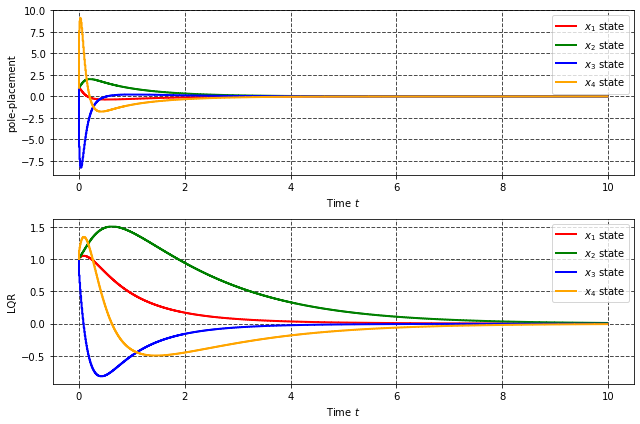

In [ ]:
t = np.arange(0, 10, dt)
x0 = [1,1,1,1]

print("A_d:\n", A_d)
print("B_d:\n", B_d)

def discrete_sim(K):
    x_d = x0
    x_disc = x0
    for time in t:
        u_d = - np.dot(K, x_d)  
        x_d = np.dot(A_d, x_d) + np.dot(B_d, u_d)
        x_disc = np.vstack((x_disc, x_d))
    t_disc = np.insert(t, 0, 0)
    return x_disc, t_disc


x_d_sol_pole, t_disc = discrete_sim(K_pp)
x_d_sol_lqr, t_disc = discrete_sim(K_lqr)

f, (ax1, ax2) = subplots(2, 1)
f.set_size_inches(9, 6)

colors = ['r', 'g', 'b', 'orange']
for i in range(4):
    ax1.step(t_disc, x_d_sol_pole[:,i], colors[i], linewidth = 2., label = r'$x_{}$ state'.format(i+1))
ax1.legend()
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.grid(True)
ax1.set_ylabel(r'pole-placement')
ax1.set_xlabel(r'Time $t$')

for i in range(4):
    ax2.step(t_disc, x_d_sol_lqr[:,i], colors[i], linewidth = 2., label = r'$x_{}$ state'.format(i+1))
ax2.legend()
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.grid(True)
ax2.set_ylabel(r'LQR')
ax2.set_xlabel(r'Time $t$')
f.tight_layout()
f.show()

## 12. Find Lyapunov function that proves the system's stability (one for continious time and one discrete time versions).

In [ ]:
from scipy import linalg
q = np.eye(4)
print("Contineous-time Lyapunnov function matrix\n", linalg.solve_continuous_lyapunov(A, q),'\n')
print("Discrete-time Lyapunnov function matrix\n", linalg.solve_discrete_lyapunov(A_d, q))

Contineous-time Lyapunnov function matrix
 [[-0.09040648 -0.41075541  0.5         0.67736111]
 [-0.41075541 -1.09394765 -0.67736111  0.5       ]
 [ 0.5        -0.67736111  1.8814632   1.25144661]
 [ 0.67736111  0.5         1.25144661 -1.42893518]] 

Discrete-time Lyapunnov function matrix
 [[  10.28950038   39.45655213  -49.05202934  -62.74885063]
 [  39.45655213  110.68826824   63.85375351  -50.67152569]
 [ -49.05202934   63.85375351 -189.59413168 -110.49028839]
 [ -62.74885063  -50.67152569 -110.49028839  134.30513759]]


# Task 2 (4 points)

You are given a system:

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
1 & 5 & -2 \\
2 & 1 & -3 \\
-1 & -2 & 7
\end{bmatrix}
x
+ 
\begin{bmatrix} 
2 \\
1 \\
0
\end{bmatrix}
u \\
u = -\begin{bmatrix} 
7k & 6k & -50k
\end{bmatrix} x
\end{cases}
$$

##1. How do the eigenvalues of the closed-loop system depend on k? Plot the evolution of the eigenvalues on a complex plane, as $k$ changes from 0 to 5. 

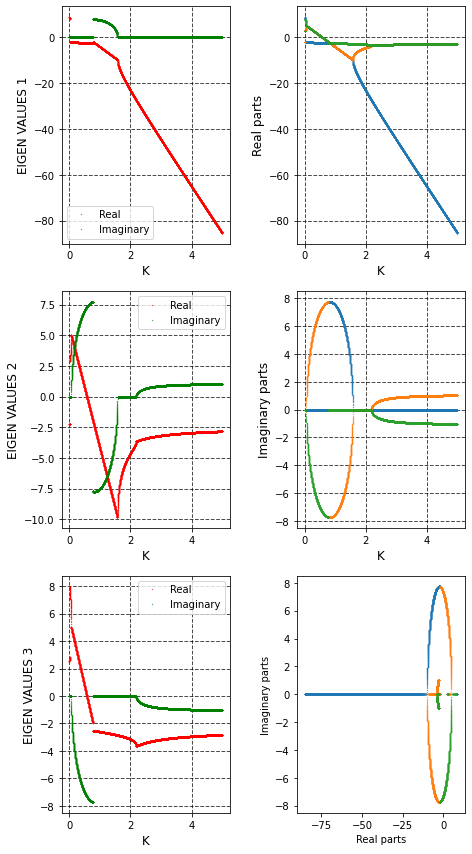

In [ ]:
A = np.array([[1, 5, -2],
              [2, 1, -3],
              [-1, -2, 7]])

B = np.array([[2],
              [1],
              [0]])

C = np.array([[0., 0., 0.]])


N = int(1E4) # Numbers of points in time span
k0 = 0
kf = 5

k_space = np.linspace(k0, kf, N)
Eigenvalues = np.full((N, 3), 0j)

for i in range(N):
    C[0, 0] = 7   * k_space[i]
    C[0, 1] = 6   * k_space[i]
    C[0, 2] = -50 * k_space[i]
    ei, v = np.linalg.eig((A - B.dot(C)))
    for j in range(len(ei)):
      Eigenvalues[i, j] = ei[j]


f, ((ax1, bx1), (ax2, bx2), (ax3, bx3)) = subplots(3, 2)

ax1.set_ylabel("EIGEN VALUES 1", fontsize=12)
ax1.set_xlabel("K", fontsize=12)
ax1.plot(k_space, Eigenvalues[:, 0].real, 'o', markersize=0.3, color = 'red', label='Real')
ax1.plot(k_space, Eigenvalues[:, 0].imag, 'o', markersize=0.3, color = 'green', label = 'Imaginary')
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.legend()

ax2.set_ylabel("EIGEN VALUES 2", fontsize=12)
ax2.set_xlabel("K", fontsize=12)
ax2.plot(k_space, Eigenvalues[:, 1].real, 'o', markersize=0.3, color = 'red', label='Real')
ax2.plot(k_space, Eigenvalues[:, 1].imag, 'o', markersize=0.3, color = 'green', label = 'Imaginary')
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.legend()

ax3.set_ylabel("EIGEN VALUES 3", fontsize=12)
ax3.set_xlabel("K", fontsize=12)
ax3.plot(k_space, Eigenvalues[:, 2].real, 'o', markersize=0.3, color = 'red', label='Real')
ax3.plot(k_space, Eigenvalues[:, 2].imag, 'o', markersize=0.3, color = 'green', label = 'Imaginary')
ax3.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax3.legend()

bx1.set_ylabel("Real parts", fontsize=12)
bx1.set_xlabel("K", fontsize=12)
bx1.plot(k_space, Eigenvalues[:, 0].real, 'o', markersize=0.3)
bx1.plot(k_space, Eigenvalues[:, 1].real, 'o', markersize=0.3)
bx1.plot(k_space, Eigenvalues[:, 2].real, 'o', markersize=0.3)
bx1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
# bx1.legend()

bx2.set_ylabel("Imaginary parts", fontsize=12)
bx2.set_xlabel("K", fontsize=12)
bx2.plot(k_space, Eigenvalues[:, 0].imag, 'o', markersize=0.3)
bx2.plot(k_space, Eigenvalues[:, 1].imag, 'o', markersize=0.3)
bx2.plot(k_space, Eigenvalues[:, 2].imag, 'o', markersize=0.3)
bx2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
# bx2.legend()
f.set_figwidth(7)
f.set_figheight(14)

bx3.plot(Eigenvalues[:, 0].real, Eigenvalues[:, 0].imag, 'o', markersize=0.3)
bx3.plot(Eigenvalues[:, 1].real, Eigenvalues[:, 1].imag, 'o', markersize=0.3)
bx3.plot(Eigenvalues[:, 2].real, Eigenvalues[:, 2].imag, 'o', markersize=0.3)
bx3.set_xlabel('Real parts')
bx3.set_ylabel('Imaginary parts')

f.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.2)
show()

## 2. Chose a value of $k$ that allows the system to be stable. USe bode plot to find stability margins of teh closed-loop system.

$K = 2$

In [ ]:
K = 2
C = np.array(
   [[(7*K), (6*K), (-50*K)]]
)
ei, v = np.linalg.eig((A - B.dot(C)))
print(f"Eigen values for K={K}: {ei}")

Eigen values for K=2: [-23.23293679  -4.61394675  -3.15311646]


/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


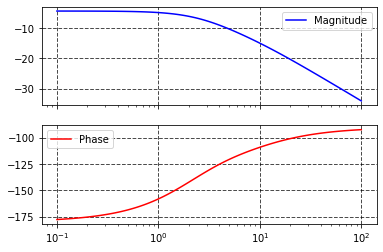

In [ ]:
C2 = np.array([[1, 0, 0]])
D2 = np.array([[0]])

G = ss2tf(A, B, C2, D2)
sys = TransferFunction(G[0], G[1])

w, mag, phase = sys.bode()

f, (ax1, ax2) = subplots(2, 1, sharex=True)
ax1.semilogx(w, mag, color="blue", label="Magnitude")    # Bode magnitude plot
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.grid(True)
ax1.legend()

ax2.semilogx(w, phase, color="red", label="Phase")  # Bode phase plot
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.grid(True)
ax2.legend()
show()

Phase Crossover frequency: None  
**Gain margin:** $∞$ as Phase never reaches $-180°$

Gain crossover frequency: None  
**Phase margin:** $∞$ as Gain never reaches $0$

## 3. Discretize the closed-loop system with $\Delta t = 0.05$ and simulate both the continues-time and discrete-time versions, show if there is a difference between simulation results.

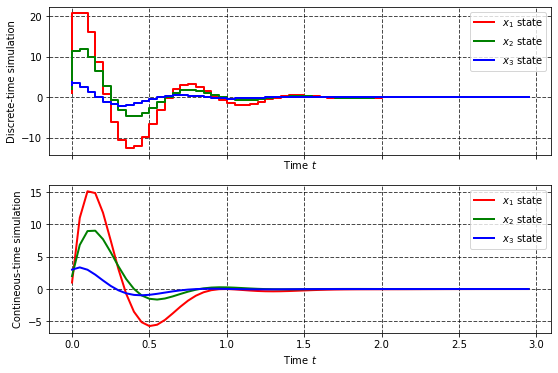

In [ ]:
A = np.array([[1, 5, -2],
              [2, 1, -3],
              [-1, -2, 7]])

B = np.array([[2],
              [1],
              [0]])

C = np.array([[0., 0., 0.]])

k = 1
K = np.array(
   [[(7*k), (6*k), (-50*k)]]
)

dt = 0.05
A_d = np.eye(3) + dt*A
B_d = dt*B


t = np.arange(0, 3, dt)
x0 = [1,2,3]

def discrete_sim(K):
    x_d = x0
    x_disc = x0

    for time in t:
        u_d = - np.dot(K,x_d)  
        x_d = np.dot(A_d,x_d) + np.dot(B_d,u_d)
        x_disc = np.vstack((x_disc, x_d))

    t_disc = np.insert(t, 0, 0)
    return x_disc, t_disc

x_d_sol, t_disc = discrete_sim(K)
x_sol = odeint(system_ode, x0, t, args=(A, B, K,))

f, (ax1, ax2) = subplots(2, 1, sharex=True)
f.set_size_inches(9, 6)

colors = ['r', 'g', 'b']
for i in range(3):
    ax1.step(t_disc, x_d_sol[:,i], colors[i], linewidth = 2., label = r'$x_{}$ state'.format(i+1))
ax1.legend()
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.grid(True)
ax1.set_ylabel(r'Discrete-time simulation')
ax1.set_xlabel(r'Time $t$')

for i in range(3):
    ax2.plot(t, x_sol[:,i], colors[i], linewidth = 2., label = r'$x_{}$ state'.format(i+1))
ax2.legend()
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.grid(True)
ax2.set_ylabel(r'Contineous-time simulation')
ax2.set_xlabel(r'Time $t$')

f.show()

## 4. What is the smallest value of $k$ that makes the eigenvalues purely real?

In [ ]:
k_space = np.arange(-10, 10, 0.0001)

for (i,k) in enumerate(k_space):
  u = np.array([[(7*k), (6*k), (-50*k)]])
  ei, v = np.linalg.eig(A-np.dot(B, u))
  if (np.imag(ei) == 0).all():
    print(f"K={k} with following eigenvales: {ei}")
    i1 = i
    break


for k in k_space[i1:]:
  u = np.array([[(7*k), (6*k), (-50*k)]])
  ei, v = np.linalg.eig(A-np.dot(B, u))
  if (np.imag(ei) == 0).all() and (np.real(ei) < 0).all():
    print(f"K={k} with following eigenvales: {ei}")
    break

K=-0.6984000000216781 with following eigenvales: [25.83967265 -1.42380604 -1.44786661]
K=1.577399999973018 with following eigenvales: [-9.94190899 -9.75187026 -2.85422075]


Found $K ≃ -0.6984$ yielding in unstable system

Found $K ≃ 1.5774$ yielding in stable system

# Task 3 (3 points)

You are given a system:

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 1 \\
1 & 10
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
1
\end{bmatrix}
u \\
u = 
-\begin{bmatrix} 
5k & k
\end{bmatrix} x
\end{cases}
$$

You can chose any positive value of $k$ to design your controller. What is least-norm control gain (control gain is the matrix $\begin{bmatrix} 
5k & k
\end{bmatrix}$) that makes the system not only be stable, but also exhibit no oscillations in the transient process?

Substituting $u$ obtain
$$ 
\dot x = 
\begin{bmatrix} 
0 & 1 \\
1 & 10
\end{bmatrix}
x
- 
\begin{bmatrix} 
0 & 0\\
5k & k
\end{bmatrix}
x
$$
$$ 
\dot x = 
\begin{bmatrix} 
0 & 1 \\
1-5k & 10-k
\end{bmatrix}
x
$$
System is stable and exhibit no oscillations in the transient process when for all $λ,\ Re(λ)<0$ and $Im(λ)=0$
$$
Det\left(
  \begin{bmatrix} 
-λ & 1 \\
1-5k & 10-k-λ
\end{bmatrix}
\right)=0
$$
$$
λ^2+(k-10)λ+(5k-1)=0\\
λ=\frac{10-k ± \sqrt{(10-k)^2-4(5k-1)}}{2}\\
λ=\frac{10-k ± \sqrt{k^2-40k+104}}{2}
$$
Recalling limitations of 
$$
\begin{cases}
Re(λ)<0 \\
Im(λ)=0
\end{cases}
\\
\begin{cases}
10-k + \sqrt{k^2-40k+104} < 0\\
k^2-40k+104 > 0
\end{cases}\\
\begin{cases}
k-10 > \sqrt{k^2-40k+104}\\
k^2-40k+104 > 0
\end{cases}
$$

$$
\begin{cases}
k\in(20+2\sqrt{74};\ ∞)\\
k\in (-∞;\ 20-2\sqrt{74})∩(20+2\sqrt{74};\ ∞)
\end{cases}\\
k\in(20+2\sqrt{74};\ ∞)\\
20+2\sqrt{74} ≃ 37.2046505340853
$$

In [ ]:
A = np.array([[0, 1],
              [1, 10]])

C = np.array([[0, 0],
              [5, 1]])


print("K = 37.2046505340854, λ =", np.linalg.eig(A-(C*37.2046505340854))[0])
print("K = 37.2046505340853, λ =", np.linalg.eig(A-(C*37.2046505340853))[0])
print("K = 37.2046505340852, λ =", np.linalg.eig(A-(C*37.2046505340852))[0])

K = 37.2046505340854, λ = [-13.60232414 -13.6023264 ]
K = 37.2046505340853, λ = [-13.60232464 -13.6023259 ]
K = 37.2046505340852, λ = [-13.60232527+6.63830364e-07j -13.60232527-6.63830364e-07j]


As we can see $K = 20+2\sqrt{74}$ is the point after which system no longer oscilates.